In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241109_185224.braidz")
df,csvs["opto"]


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241109_185224.braidz using pyarrow


(          obj_id    frame     timestamp         x         y         z  \
 0              1       10           NaN  0.101441  0.144278  0.084023   
 1              1       11           NaN  0.100927  0.144987  0.083829   
 2              1       12           NaN  0.100708  0.145867  0.083545   
 3              1       13           NaN  0.100463  0.146679  0.083294   
 4              1       14           NaN  0.100214  0.147469  0.083016   
 ...          ...      ...           ...       ...       ...       ...   
 12445428  414236  8634804  1.731261e+09 -0.205502  0.052087 -0.003247   
 12445429  414148  8634805  1.731261e+09 -0.023952 -0.149673 -0.002192   
 12445430  414236  8634805  1.731261e+09 -0.205387  0.052138 -0.003170   
 12445431  414148  8634806  1.731261e+09 -0.023966 -0.149678 -0.002187   
 12445432  414236  8634806  1.731261e+09 -0.205256  0.052243 -0.003204   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.028515  0.084656 -0.026322

In [3]:
data = extract_stimulus_centered_data(df, csvs["opto"])

In [4]:
AngV = data["angular_velocity"]

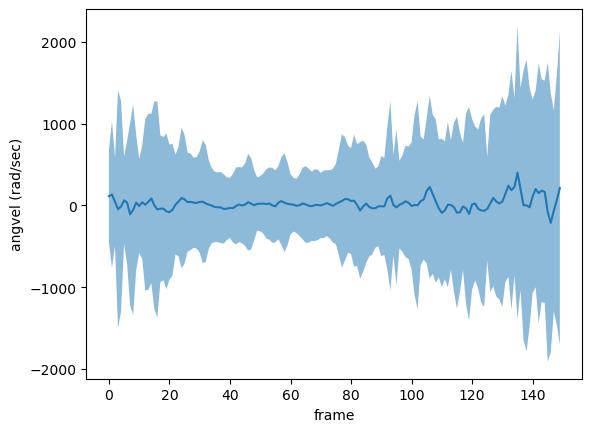

In [5]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

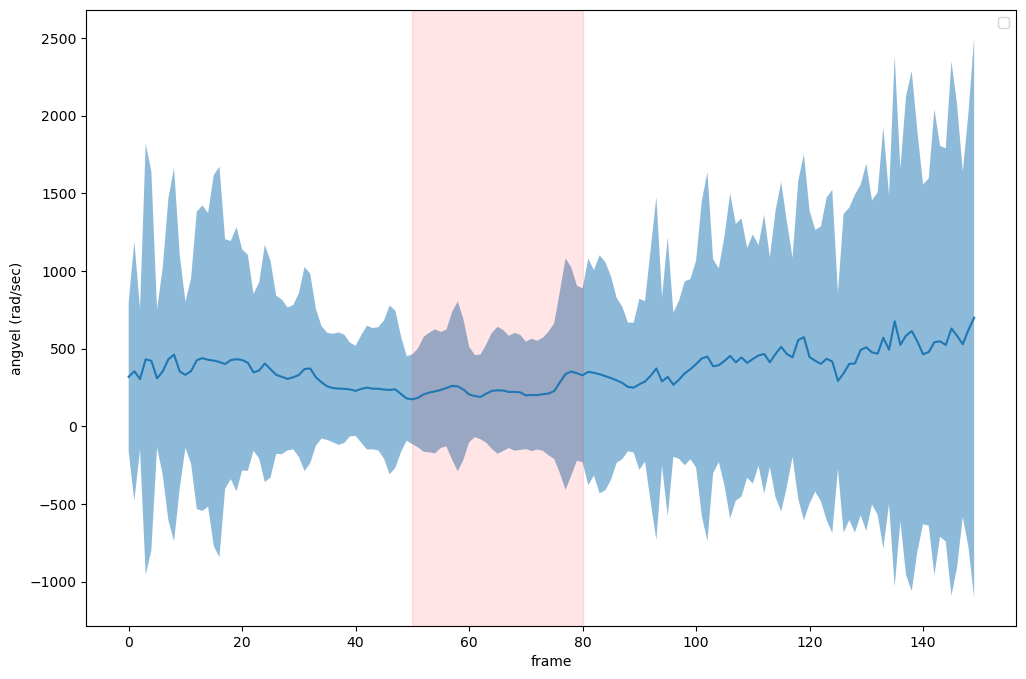

In [6]:
# Creating the plot with a specific figure size
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

# Plotting data and setting labels
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.1)
ax.legend()
plt.show()

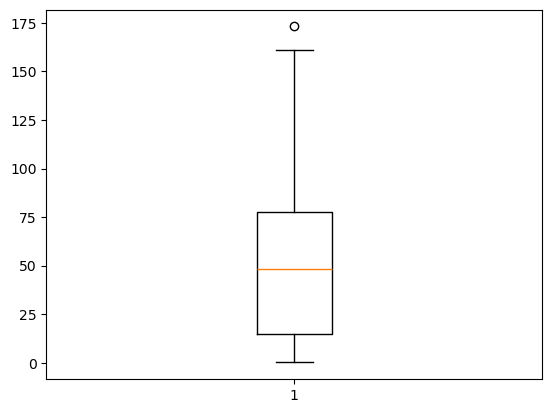

In [7]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()

In [14]:
timestamp_column = csvs["opto"]["timestamp"]
print(timestamp_column)
timestamp_column.to_csv('timestamp_output.csv', index=False)

0      1.731175e+09
1      1.731176e+09
2      1.731176e+09
3      1.731176e+09
4      1.731176e+09
           ...     
180    1.731242e+09
181    1.731246e+09
182    1.731251e+09
183    1.731255e+09
184    1.731259e+09
Name: timestamp, Length: 185, dtype: float64


AttributeError: 'tuple' object has no attribute 'to_csv'